C:\Users\luzif\AppData\Local\Temp\ipykernel_10064\1214086153.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI", start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
c:\Program Files\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0024
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.0777e-04
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.1485e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.9347e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.6701e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.5054e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.3845e-04
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.4093e-04
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.3399e-04
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.1696e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


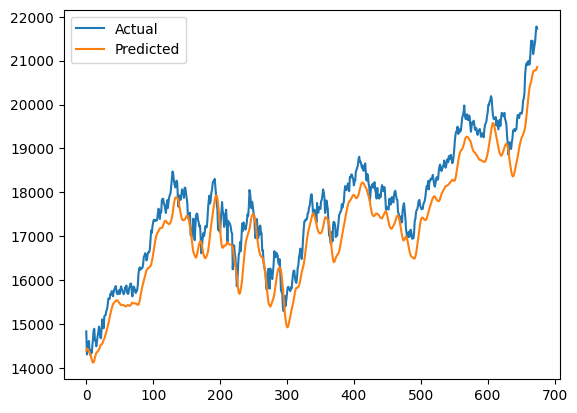

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data=pd.read_csv("D:\\Source_code\\Lab\\data\\NIFTY50_all.csv")
price=data['Close'].astype('float32')

X,Y=[],[]
time_step=10

scaler=MinMaxScaler((0,1))
price=scaler.fit_transform(price.values.reshape(-1,1))

for i in range(time_step,len(price)):
    X.append(price[i-time_step:i]) 
    Y.append(price[i]) 

X=np.array(X)
Y=np.array(Y)

X=X.reshape(X.shape[0],X.shape[1],1)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,shuffle=False,random_state=42,test_size=0.2)


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(xtrain, ytrain, epochs=5, validation_data=(xtest, ytest), batch_size=64)


pred = model.predict(xtest)

ytest=scaler.inverse_transform(ytest)
pred=scaler.inverse_transform(pred)



plt.plot(ytest, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.title("Simple LSTM Stock Prediction")
plt.show()